#Dipake

##BBCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah/Data Mining/BBCA.JK.csv")
#data = data.dropna()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data["Close"].values, seq_length)
X_val = create_sequences(val_data["Close"].values, seq_length)
X_test = create_sequences(test_data["Close"].values, seq_length)

y_train = X_train[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]

X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# ... (rest of the code for plotting and evaluation) ...


Epoch 1/50
46/46 [==============================] - 4s 23ms/step - loss: 0.0103 - val_loss: 0.0018
Epoch 2/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 9.8448e-04
Epoch 9/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 9.4835e-04
Epoch 10/50
46/46 [==============================] - 0s 10ms/step - loss: 9.6307e-04 - val_loss: 0.0011
Epoc

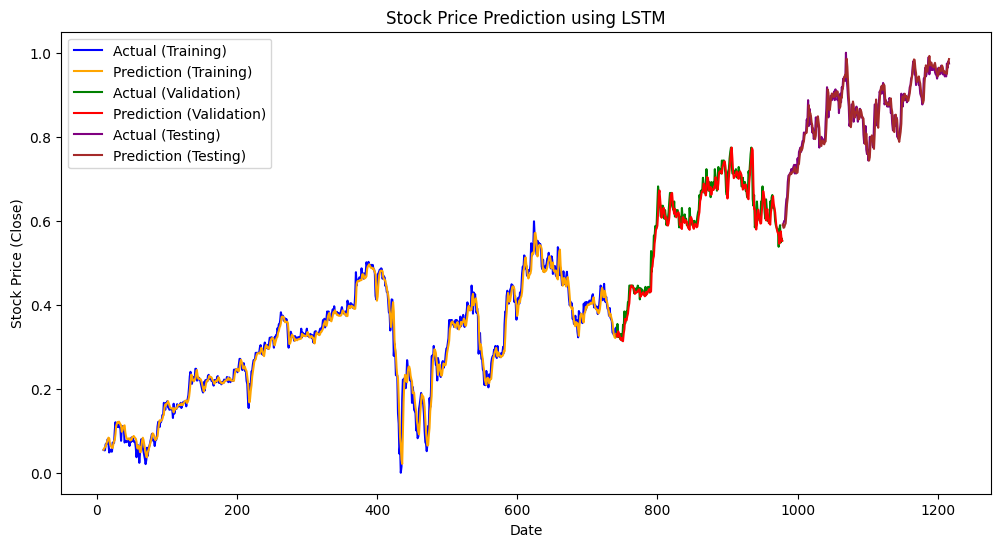

Training MAE: 0.014299385289706487
Validation MAE: 0.017326373117903058
Testing MAE: 0.01719653245359965
Training RMSE: 0.021506013586722834
Validation RMSE: 0.023898792602933993
Testing RMSE: 0.022677918624065947
Training MAPE: inf %
Validation MAPE: 2.9116474164764665 %
Testing MAPE: 2.0247475921872127 %


<ipython-input-20-6f82a852741c>:32: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:

# Invers transformasi data prediksi untuk mengembalikan ke skala awal
train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Invers transformasi data actual
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Membuat grafik
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], y_train_actual, label='Actual (Training)', color='blue')
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Prediction (Training)', color='orange')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual (Validation)', color='green')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], val_predictions, label='Prediction (Validation)', color='red')


plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], y_test_actual, label='Actual (Testing)', color='purple')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], test_predictions, label='Prediction (Testing)', color='brown')



plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train_actual, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val_actual, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test_actual, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


Epoch 1/50
46/46 [==============================] - 1s 6ms/step - loss: 0.0088 - val_loss: 0.0035
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 9.7347e-04 - val_loss: 8.6083e-04
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 7.5452e-04 - val_loss: 8.1583e-04
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 6.8267e-04 - val_loss: 7.3173e-04
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 6.2621e-04 - val_loss: 9.3375e-04
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 5.7905e-04 - val_loss: 6.8291e-04
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 5.5061e-04 - val_loss: 0.0010
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 5.3068e-04 - val_loss: 0.0010
Epoch 10/50
46/46 [==============================] - 0s 4ms/step - los

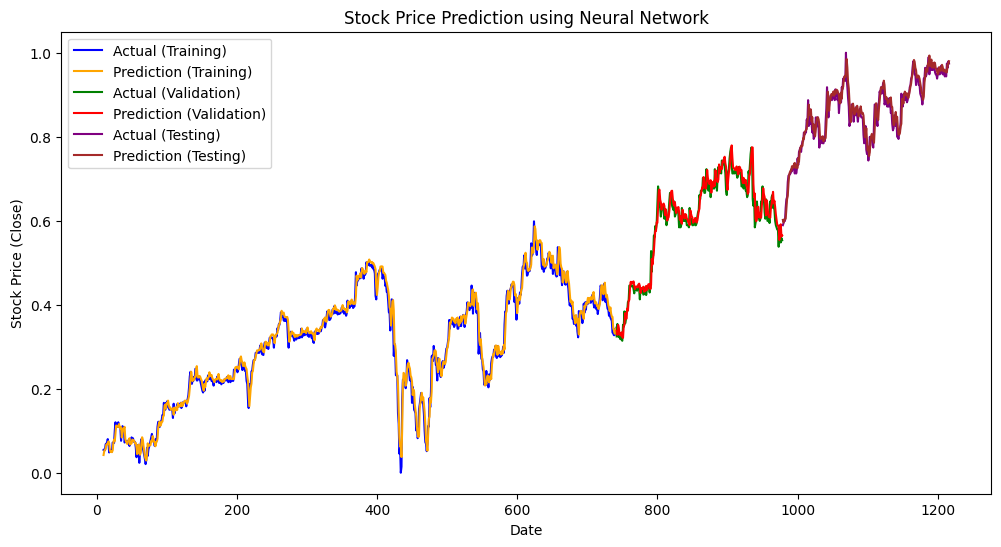

Training MAE: 0.013395670327144655
Validation MAE: 0.017653539177109698
Testing MAE: 0.01658253059283041
Training RMSE: 0.018855327775561266
Validation RMSE: 0.02336282714672494
Testing RMSE: 0.021814388924190874
Training MAPE: inf %
Validation MAPE: 3.008034477428491 %
Testing MAPE: 1.9456932283801478 %


<ipython-input-21-a4bfcdaf0e58>:84: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data["Close"].values, seq_length)
X_val = create_sequences(val_data["Close"].values, seq_length)
X_test = create_sequences(test_data["Close"].values, seq_length)

y_train = X_train[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]

X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=seq_length))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], y_train_actual, label='Actual (Training)', color='blue')
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Prediction (Training)', color='orange')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual (Validation)', color='green')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], val_predictions, label='Prediction (Validation)', color='red')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], y_test_actual, label='Actual (Testing)', color='purple')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], test_predictions, label='Prediction (Testing)', color='brown')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using Neural Network')
plt.legend()
plt.show()

# Matriks Pengujian
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train_actual, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val_actual, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test_actual, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


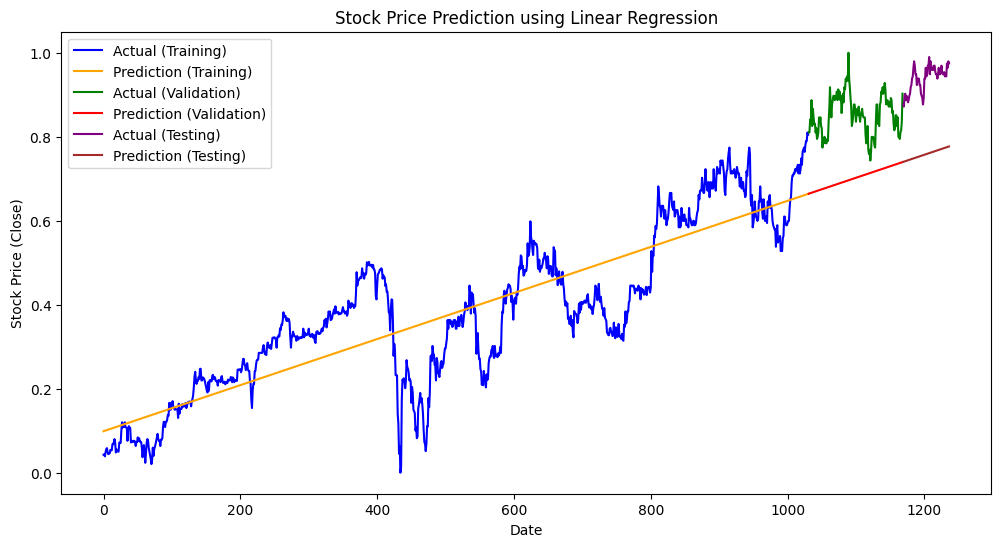

Training MAE: 0.07814884831453792
Validation MAE: 0.1499122038838429
Testing MAE: 0.17986160442979957
Training RMSE: 0.09543113394327465
Validation RMSE: 0.15835916075964734
Testing RMSE: 0.18151561600553312
Training MAPE: inf %
Validation MAPE: 17.352837294624596 %
Testing MAPE: 19.107744084851443 %


<ipython-input-22-58b948cd13ee>:54: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
X = data.index.values.reshape(-1, 1)  # Use the index as the feature for Linear Regression
y = data["Close"].values

# Use TimeSeriesSplit for data splitting (60% training, 20% validation, 20% testing)
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

tscv_val = TimeSeriesSplit(n_splits=2)
for val_index, test_index in tscv_val.split(X_temp):
    X_val, X_test = X_temp[val_index], X_temp[test_index]
    y_val, y_test = y_temp[val_index], y_temp[test_index]

# Training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
train_predictions = regressor.predict(X_train)
val_predictions = regressor.predict(X_val)
test_predictions = regressor.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, label='Actual (Training)', color='blue')
plt.plot(X_train, train_predictions, label='Prediction (Training)', color='orange')
plt.plot(X_val, y_val, label='Actual (Validation)', color='green')
plt.plot(X_val, val_predictions, label='Prediction (Validation)', color='red')
plt.plot(X_test, y_test, label='Actual (Testing)', color='purple')
plt.plot(X_test, test_predictions, label='Prediction (Testing)', color='brown')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()

# Matriks Pengujian
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


##Arto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah/Data Mining/ARTO.JK.csv")
data = data.dropna()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data["Close"].values, seq_length)
X_val = create_sequences(val_data["Close"].values, seq_length)
X_test = create_sequences(test_data["Close"].values, seq_length)

y_train = X_train[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]

X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# ... (rest of the code for plotting and evaluation) ...


Epoch 1/50
46/46 [==============================] - 4s 36ms/step - loss: 0.0093 - val_loss: 0.0177
Epoch 2/50
46/46 [==============================] - 0s 8ms/step - loss: 5.3087e-04 - val_loss: 0.0077
Epoch 3/50
46/46 [==============================] - 1s 11ms/step - loss: 4.7786e-04 - val_loss: 0.0055
Epoch 4/50
46/46 [==============================] - 1s 13ms/step - loss: 4.5800e-04 - val_loss: 0.0033
Epoch 5/50
46/46 [==============================] - 1s 14ms/step - loss: 4.3033e-04 - val_loss: 0.0025
Epoch 6/50
46/46 [==============================] - 1s 13ms/step - loss: 4.2234e-04 - val_loss: 0.0048
Epoch 7/50
46/46 [==============================] - 1s 14ms/step - loss: 4.2663e-04 - val_loss: 0.0030
Epoch 8/50
46/46 [==============================] - 1s 14ms/step - loss: 4.0370e-04 - val_loss: 0.0035
Epoch 9/50
46/46 [==============================] - 1s 13ms/step - loss: 4.0121e-04 - val_loss: 0.0032
Epoch 10/50
46/46 [==============================] - 0s 11ms/step - loss: 3.95

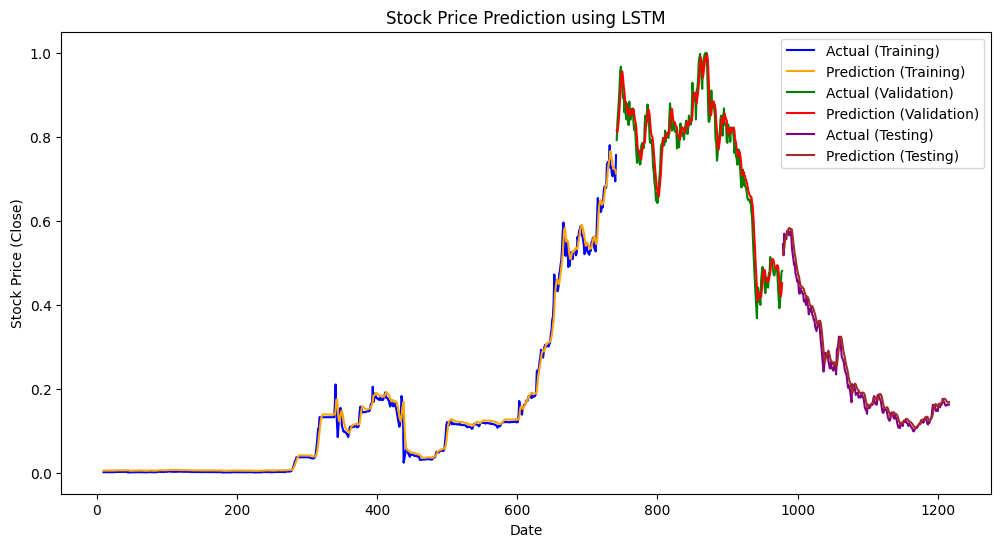

Training MAE: 0.008927487785300036
Validation MAE: 0.027354804331414347
Testing MAE: 0.014105980796926843
Training RMSE: 0.014914604585016778
Validation RMSE: 0.03377820417452585
Testing RMSE: 0.018071160585056614
Training MAPE: inf %
Validation MAPE: 3.9843040857787884 %
Testing MAPE: 6.528171411086374 %


<ipython-input-32-6f82a852741c>:32: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:

# Invers transformasi data prediksi untuk mengembalikan ke skala awal
train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Invers transformasi data actual
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Membuat grafik
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], y_train_actual, label='Actual (Training)', color='blue')
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Prediction (Training)', color='orange')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual (Validation)', color='green')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], val_predictions, label='Prediction (Validation)', color='red')


plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], y_test_actual, label='Actual (Testing)', color='purple')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], test_predictions, label='Prediction (Testing)', color='brown')



plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train_actual, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val_actual, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test_actual, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


Epoch 1/50
46/46 [==============================] - 1s 6ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 3.0272e-04 - val_loss: 0.0014
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 2.4562e-04 - val_loss: 0.0040
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 2.3607e-04 - val_loss: 0.0014
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 1.9584e-04 - val_loss: 9.4112e-04
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 1.9762e-04 - val_loss: 0.0030
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 1.9464e-04 - val_loss: 9.5466e-04
Epoch 8/50
46/46 [==============================] - 0s 5ms/step - loss: 1.7973e-04 - val_loss: 0.0018
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 1.7529e-04 - val_loss: 0.0011
Epoch 10/50
46/46 [==============================] - 0s 7ms/step - loss: 3.120

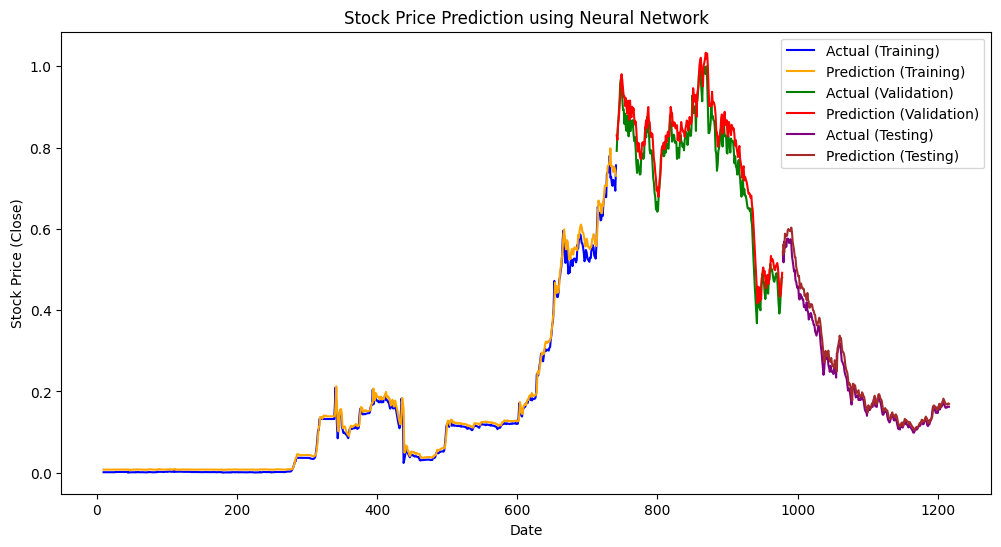

Training MAE: 0.010033720375828078
Validation MAE: 0.03779626017525385
Testing MAE: 0.01667240940244404
Training RMSE: 0.014401020295173475
Validation RMSE: 0.04438260095770946
Testing RMSE: 0.021283346569472283
Training MAPE: inf %
Validation MAPE: 5.409789322958282 %
Testing MAPE: 6.9318857225625035 %


<ipython-input-29-a4bfcdaf0e58>:84: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data["Close"].values, seq_length)
X_val = create_sequences(val_data["Close"].values, seq_length)
X_test = create_sequences(test_data["Close"].values, seq_length)

y_train = X_train[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]

X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=seq_length))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], y_train_actual, label='Actual (Training)', color='blue')
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Prediction (Training)', color='orange')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual (Validation)', color='green')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], val_predictions, label='Prediction (Validation)', color='red')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], y_test_actual, label='Actual (Testing)', color='purple')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], test_predictions, label='Prediction (Testing)', color='brown')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using Neural Network')
plt.legend()
plt.show()

# Matriks Pengujian
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train_actual, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val_actual, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test_actual, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


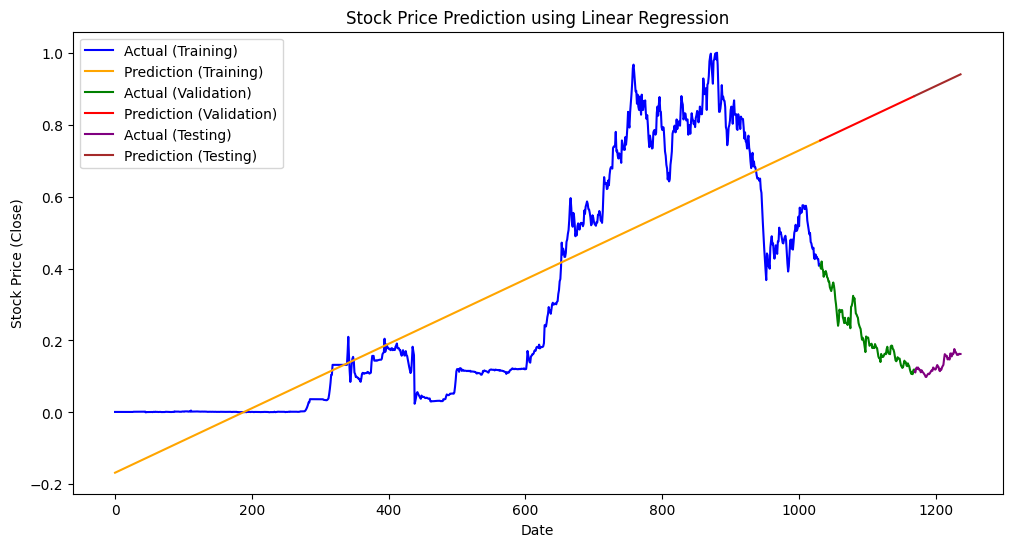

Training MAE: 0.14126056874795295
Validation MAE: 0.592553858222903
Testing MAE: 0.7773934017557412
Training RMSE: 0.1712599755996202
Validation RMSE: 0.604214477169976
Testing RMSE: 0.7774774207189277
Training MAPE: inf %
Validation MAPE: 320.9693591415133 %
Testing MAPE: 604.3540611281551 %


<ipython-input-30-58b948cd13ee>:54: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
X = data.index.values.reshape(-1, 1)  # Use the index as the feature for Linear Regression
y = data["Close"].values

# Use TimeSeriesSplit for data splitting (60% training, 20% validation, 20% testing)
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

tscv_val = TimeSeriesSplit(n_splits=2)
for val_index, test_index in tscv_val.split(X_temp):
    X_val, X_test = X_temp[val_index], X_temp[test_index]
    y_val, y_test = y_temp[val_index], y_temp[test_index]

# Training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
train_predictions = regressor.predict(X_train)
val_predictions = regressor.predict(X_val)
test_predictions = regressor.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, label='Actual (Training)', color='blue')
plt.plot(X_train, train_predictions, label='Prediction (Training)', color='orange')
plt.plot(X_val, y_val, label='Actual (Validation)', color='green')
plt.plot(X_val, val_predictions, label='Prediction (Validation)', color='red')
plt.plot(X_test, y_test, label='Actual (Testing)', color='purple')
plt.plot(X_test, test_predictions, label='Prediction (Testing)', color='brown')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()

# Matriks Pengujian
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


##BSIIIIIII

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah/Data Mining/BRIS.JK.csv")
data = data.dropna()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data["Close"].values, seq_length)
X_val = create_sequences(val_data["Close"].values, seq_length)
X_test = create_sequences(test_data["Close"].values, seq_length)

y_train = X_train[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]

X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# ... (rest of the code for plotting and evaluation) ...


Epoch 1/50
46/46 [==============================] - 6s 37ms/step - loss: 0.0125 - val_loss: 0.0013
Epoch 2/50
46/46 [==============================] - 1s 15ms/step - loss: 0.0016 - val_loss: 6.5380e-04
Epoch 3/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 4.9749e-04
Epoch 4/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0014 - val_loss: 5.1962e-04
Epoch 5/50
46/46 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 5.4935e-04
Epoch 6/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0014 - val_loss: 5.2821e-04
Epoch 7/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0013 - val_loss: 4.2484e-04
Epoch 8/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 4.8969e-04
Epoch 9/50
46/46 [==============================] - 1s 14ms/step - loss: 0.0012 - val_loss: 5.1119e-04
Epoch 10/50
46/46 [==============================] - 1s 16ms/step - loss: 0.0

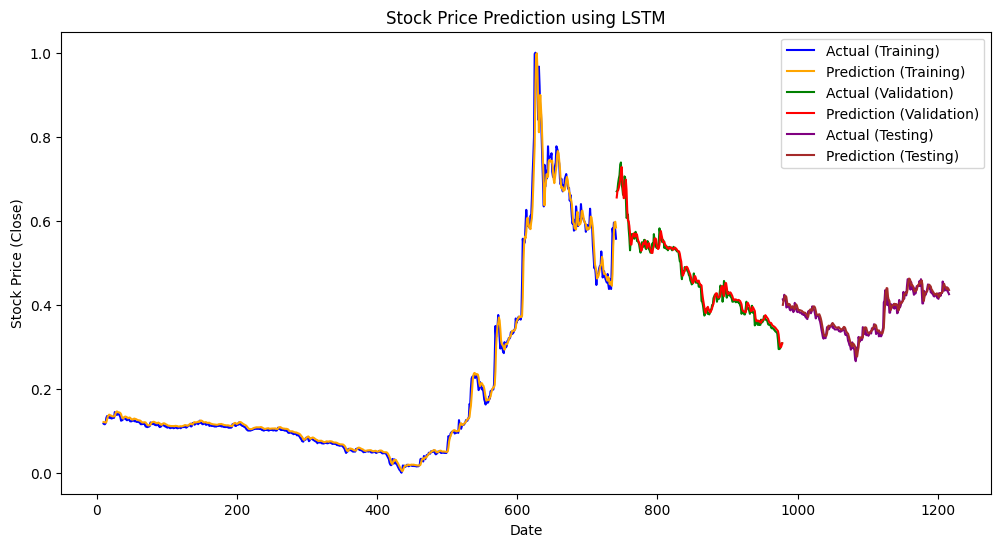

Training MAE: 0.008965450460077545
Validation MAE: 0.010387125941692638
Testing MAE: 0.009031468027355721
Training RMSE: 0.018851187639155602
Validation RMSE: 0.014229018692982624
Testing RMSE: 0.0119008710807984
Training MAPE: inf %
Validation MAPE: 2.2362518063597183 %
Testing MAPE: 2.42532805258669 %


<ipython-input-37-6f82a852741c>:32: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:

# Invers transformasi data prediksi untuk mengembalikan ke skala awal
train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Invers transformasi data actual
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Membuat grafik
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], y_train_actual, label='Actual (Training)', color='blue')
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Prediction (Training)', color='orange')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual (Validation)', color='green')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], val_predictions, label='Prediction (Validation)', color='red')


plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], y_test_actual, label='Actual (Testing)', color='purple')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], test_predictions, label='Prediction (Testing)', color='brown')



plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train_actual, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val_actual, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test_actual, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


Epoch 1/50
46/46 [==============================] - 1s 7ms/step - loss: 0.0110 - val_loss: 4.4102e-04
Epoch 2/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 3.7727e-04
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 8.9872e-04 - val_loss: 4.7903e-04
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 8.3538e-04 - val_loss: 6.1695e-04
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 7.9034e-04 - val_loss: 0.0012
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 7.6252e-04 - val_loss: 0.0018
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 8.2063e-04 - val_loss: 2.8257e-04
Epoch 9/50
46/46 [==============================] - 0s 4ms/step - loss: 6.4028e-04 - val_loss: 2.6010e-04
Epoch 10/50
46/46 [==============================] - 0s 5ms/step - los

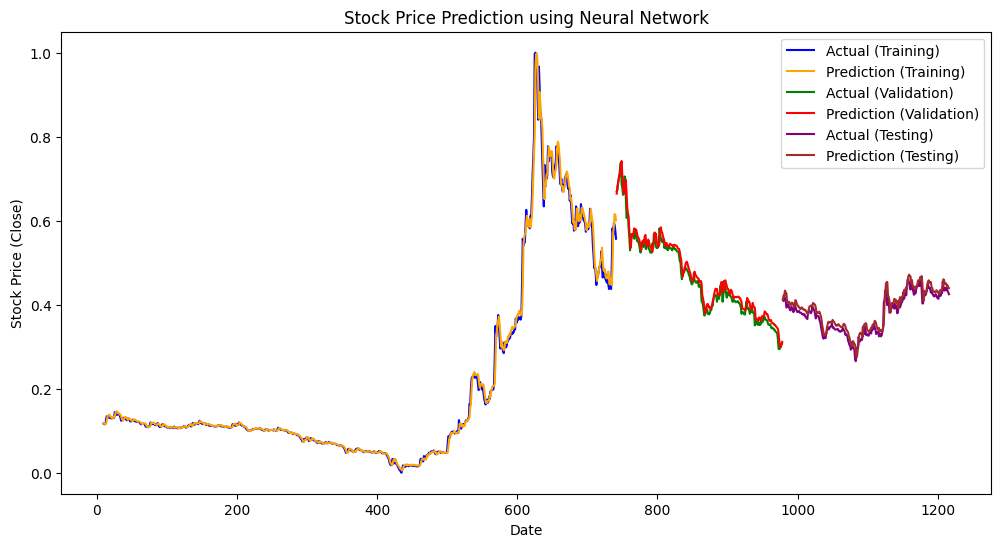

Training MAE: 0.007636964379095792
Validation MAE: 0.013657034341504093
Testing MAE: 0.013048533303150488
Training RMSE: 0.017231125981263383
Validation RMSE: 0.01658123057312774
Testing RMSE: 0.015299303502003385
Training MAPE: inf %
Validation MAPE: 3.034784548077601 %
Testing MAPE: 3.5083530219951182 %


<ipython-input-38-a4bfcdaf0e58>:84: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data["Close"].values, seq_length)
X_val = create_sequences(val_data["Close"].values, seq_length)
X_test = create_sequences(test_data["Close"].values, seq_length)

y_train = X_train[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]

X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=seq_length))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], y_train_actual, label='Actual (Training)', color='blue')
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Prediction (Training)', color='orange')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual (Validation)', color='green')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], val_predictions, label='Prediction (Validation)', color='red')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], y_test_actual, label='Actual (Testing)', color='purple')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], test_predictions, label='Prediction (Testing)', color='brown')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using Neural Network')
plt.legend()
plt.show()

# Matriks Pengujian
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train_actual, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val_actual, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test_actual, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


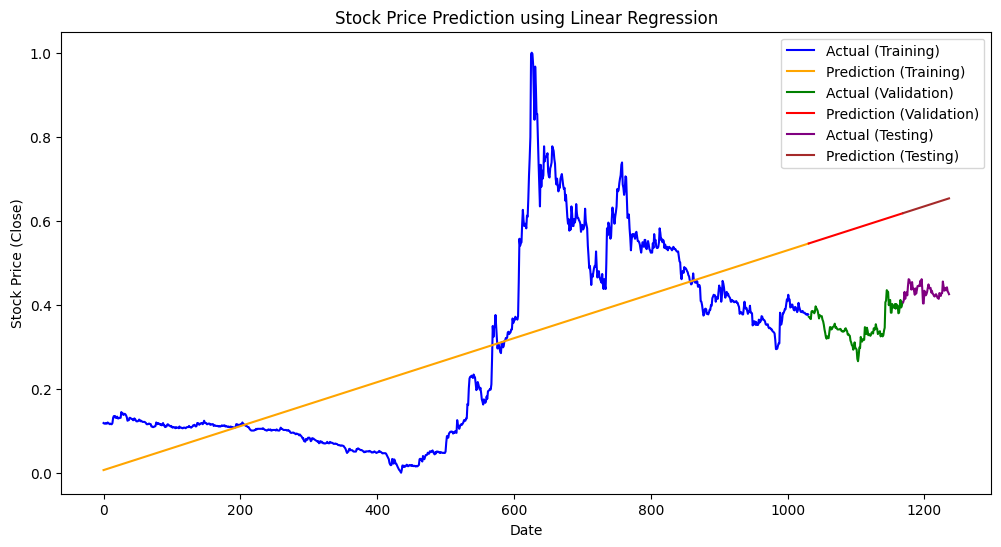

Training MAE: 0.1270100745361407
Validation MAE: 0.23168669746945245
Testing MAE: 0.20281152104755487
Training RMSE: 0.16147811523483305
Validation RMSE: 0.2345553338134513
Testing RMSE: 0.20359866687349348
Training MAPE: inf %
Validation MAPE: 67.693002706187 %
Testing MAPE: 47.00393042879153 %


<ipython-input-39-58b948cd13ee>:54: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
X = data.index.values.reshape(-1, 1)  # Use the index as the feature for Linear Regression
y = data["Close"].values

# Use TimeSeriesSplit for data splitting (60% training, 20% validation, 20% testing)
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

tscv_val = TimeSeriesSplit(n_splits=2)
for val_index, test_index in tscv_val.split(X_temp):
    X_val, X_test = X_temp[val_index], X_temp[test_index]
    y_val, y_test = y_temp[val_index], y_temp[test_index]

# Training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
train_predictions = regressor.predict(X_train)
val_predictions = regressor.predict(X_val)
test_predictions = regressor.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, label='Actual (Training)', color='blue')
plt.plot(X_train, train_predictions, label='Prediction (Training)', color='orange')
plt.plot(X_val, y_val, label='Actual (Validation)', color='green')
plt.plot(X_val, val_predictions, label='Prediction (Validation)', color='red')
plt.plot(X_test, y_test, label='Actual (Testing)', color='purple')
plt.plot(X_test, test_predictions, label='Prediction (Testing)', color='brown')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()

# Matriks Pengujian
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


##BRI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah/Data Mining/BBRI.JK.csv")
data = data.dropna()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data["Close"].values, seq_length)
X_val = create_sequences(val_data["Close"].values, seq_length)
X_test = create_sequences(test_data["Close"].values, seq_length)

y_train = X_train[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]

X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# ... (rest of the code for plotting and evaluation) ...


Epoch 1/50
46/46 [==============================] - 4s 24ms/step - loss: 0.0210 - val_loss: 0.0015
Epoch 2/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 3/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 5/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 6/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/50
46/46 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 11/50


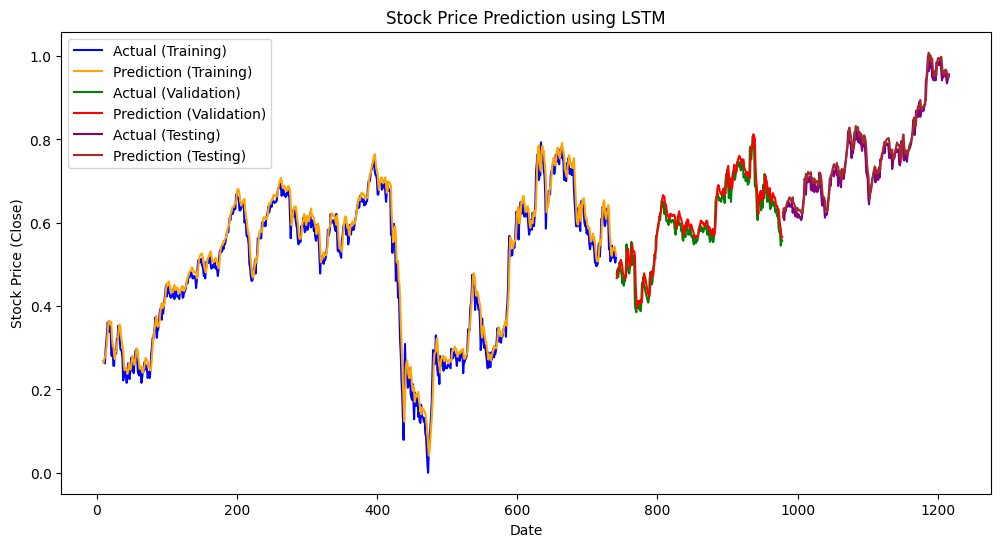

Training MAE: 0.022083083401166773
Validation MAE: 0.020909835852277223
Testing MAE: 0.01656314713339795
Training RMSE: 0.02947541371306053
Validation RMSE: 0.026538483507702482
Testing RMSE: 0.020993870137979168
Training MAPE: inf %
Validation MAPE: 3.647911369390613 %
Testing MAPE: 2.2244515113553813 %


<ipython-input-44-6f82a852741c>:32: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:

# Invers transformasi data prediksi untuk mengembalikan ke skala awal
train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Invers transformasi data actual
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Membuat grafik
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], y_train_actual, label='Actual (Training)', color='blue')
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Prediction (Training)', color='orange')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual (Validation)', color='green')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], val_predictions, label='Prediction (Validation)', color='red')


plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], y_test_actual, label='Actual (Testing)', color='purple')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], test_predictions, label='Prediction (Testing)', color='brown')



plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train_actual, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val_actual, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test_actual, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


Epoch 1/50
46/46 [==============================] - 1s 7ms/step - loss: 0.0231 - val_loss: 0.0020
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 8.0782e-04
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 8.3811e-04
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 7.7733e-04
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 9.1184e-04 - val_loss: 0.0012
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 6.8172e-04
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 8.4434e-04 - val_loss: 8.3199e-04
Epoch 10/50
46/46 [==============================] - 0s 3ms/step - loss: 8.4560e-04 - val_

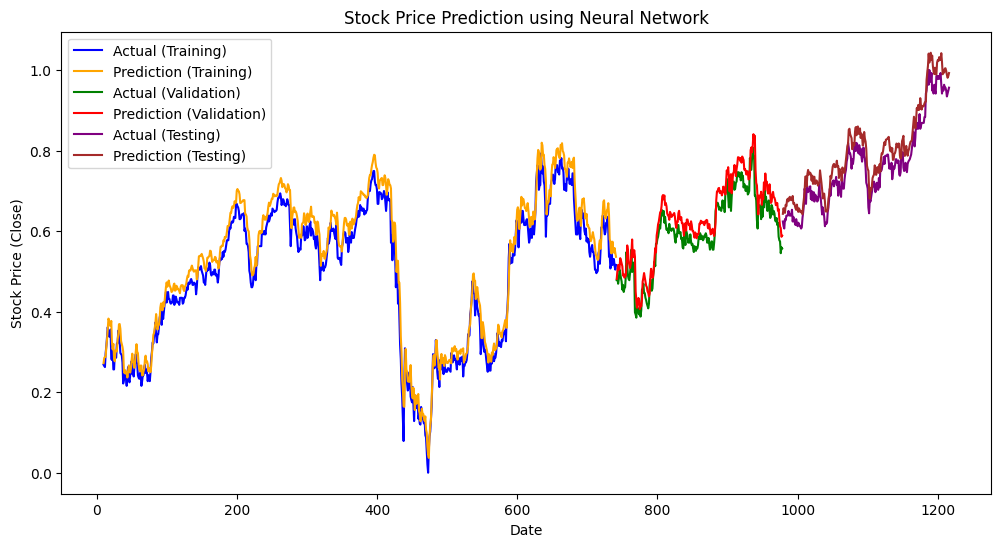

Training MAE: 0.0328183442991356
Validation MAE: 0.03619401446942139
Testing MAE: 0.038618904994131516
Training RMSE: 0.038690856326422274
Validation RMSE: 0.041601600608726426
Testing RMSE: 0.042668659338182945
Training MAPE: inf %
Validation MAPE: 6.213279800931799 %
Testing MAPE: 5.137044661964562 %


<ipython-input-45-a4bfcdaf0e58>:84: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data["Close"].values, seq_length)
X_val = create_sequences(val_data["Close"].values, seq_length)
X_test = create_sequences(test_data["Close"].values, seq_length)

y_train = X_train[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]

X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=seq_length))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], y_train_actual, label='Actual (Training)', color='blue')
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Prediction (Training)', color='orange')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual (Validation)', color='green')
plt.plot(data.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)], val_predictions, label='Prediction (Validation)', color='red')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], y_test_actual, label='Actual (Testing)', color='purple')
plt.plot(data.index[seq_length+len(train_predictions)+len(val_predictions):seq_length+len(train_predictions)+len(val_predictions)+len(y_test_actual)], test_predictions, label='Prediction (Testing)', color='brown')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using Neural Network')
plt.legend()
plt.show()

# Matriks Pengujian
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train_actual, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val_actual, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test_actual, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")


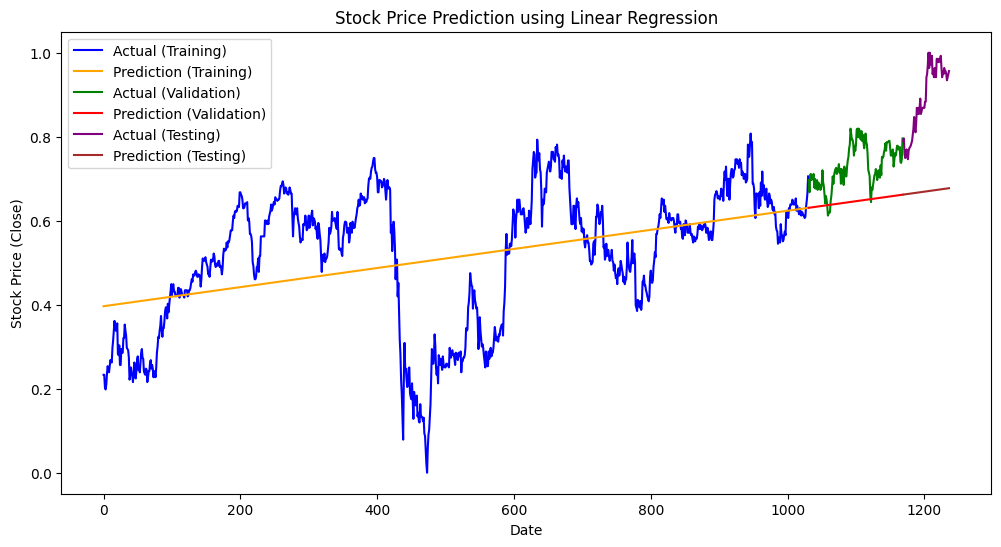

Training MAE: 0.1178260315958482
Validation MAE: 0.08483745227770263
Testing MAE: 0.22240477352267476
Training RMSE: 0.14716872073816198
Validation RMSE: 0.09506276171872415
Testing RMSE: 0.23514644787471906
Training MAPE: inf %
Validation MAPE: 11.282872372227754 %
Testing MAPE: 24.33157094731642 %


<ipython-input-46-58b948cd13ee>:54: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock data into the 'data' variable first
# For example:
# data = pd.read_csv("bbca_stock_data.csv")

data["Close"] = data["Close"].astype(float)
X = data.index.values.reshape(-1, 1)  # Use the index as the feature for Linear Regression
y = data["Close"].values

# Use TimeSeriesSplit for data splitting (60% training, 20% validation, 20% testing)
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

tscv_val = TimeSeriesSplit(n_splits=2)
for val_index, test_index in tscv_val.split(X_temp):
    X_val, X_test = X_temp[val_index], X_temp[test_index]
    y_val, y_test = y_temp[val_index], y_temp[test_index]

# Training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
train_predictions = regressor.predict(X_train)
val_predictions = regressor.predict(X_val)
test_predictions = regressor.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, label='Actual (Training)', color='blue')
plt.plot(X_train, train_predictions, label='Prediction (Training)', color='orange')
plt.plot(X_val, y_val, label='Actual (Validation)', color='green')
plt.plot(X_val, val_predictions, label='Prediction (Validation)', color='red')
plt.plot(X_test, y_test, label='Actual (Testing)', color='purple')
plt.plot(X_test, test_predictions, label='Prediction (Testing)', color='brown')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()

# Matriks Pengujian
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

train_mae, train_rmse, train_mape = calculate_metrics(y_train, train_predictions)
val_mae, val_rmse, val_mape = calculate_metrics(y_val, val_predictions)
test_mae, test_rmse, test_mape = calculate_metrics(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)

print("Training MAPE:", train_mape, "%")
print("Validation MAPE:", val_mape, "%")
print("Testing MAPE:", test_mape, "%")
